In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [2]:
train_data=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_data=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)


In [3]:
trainloader=torch.utils.data.DataLoader(dataset=train_data,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(dataset=test_data,batch_size=64,shuffle=True)

torch.Size([1, 28, 28])


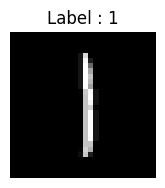

In [4]:
example=iter(trainloader)
example_data,example_targets=next(example)
print(example_data[0].shape)
plt.subplot(2,3,4)
plt.imshow(example_data[0][0],cmap='grey')
plt.title(f'Label : {example_targets[0]}')
plt.axis('off')
plt.show()

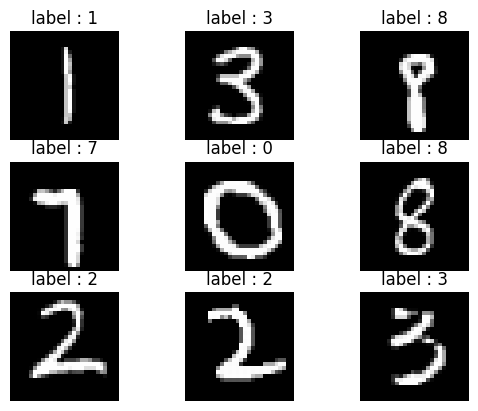

In [5]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(example_data[i][0],cmap='grey')
    plt.title(f'label : {example_targets[i]}')
    plt.axis('off')   
plt.show()    
    

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,32,kernel_size=3)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(32,64,kernel_size=3)
        self.l1=nn.Linear(64*5*5,128)
        self.l2=nn.Linear(128,10)
    def forward(self,x):
         x=self.pool(F.relu(self.conv1(x)))
         x=self.pool(F.relu(self.conv2(x)))
         x=x.view(-1,64*5*5)
         x=F.relu(self.l1(x))
         x=F.relu(self.l2(x))
         return x

In [34]:
def plot(feature_map,title):
    num_filter=feature_map.shape[1]
    fig,axes=plt.subplots(1,min(num_filter,8),figsize=(15,5))
    fig.suptitle(title)
    for i in range(min(num_filter,8)):
        axes[i].imshow(feature_map[0, i].detach().cpu().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()               

In [28]:
model = CNN()

In [29]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [30]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
epochs=10
for epoch in range(epochs):
    model.train()
    running_loss=0.0
    for images,labels in trainloader:
        images,labels=images.to(device),labels.to(device)
        optimizer.zero_grad()
        output=model(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"epoches {epoch+1}/{epochs},loss:{running_loss/len(trainloader)}")


epoches 1/10,loss:0.3963999859750398
epoches 2/10,loss:0.28211278978016363
epoches 3/10,loss:0.26650947359785726
epoches 4/10,loss:0.2585715332300837
epoches 5/10,loss:0.25481678684813475
epoches 6/10,loss:0.24977261121911026
epoches 7/10,loss:0.2480498277634975
epoches 8/10,loss:0.24538439287663077
epoches 9/10,loss:0.2440709760035279
epoches 10/10,loss:0.24255664859102097


In [31]:
model.eval() 
correct = 0
total = 0

with torch.no_grad():  
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)  
        _, predicted = torch.max(outputs.data, 1)  
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()  

print(f'Accuracy on test set: {100 * correct / total:.2f}%')


Accuracy on test set: 89.05%


In [32]:
torch.save(model.state_dict(), 'mnist_cnn.pth')

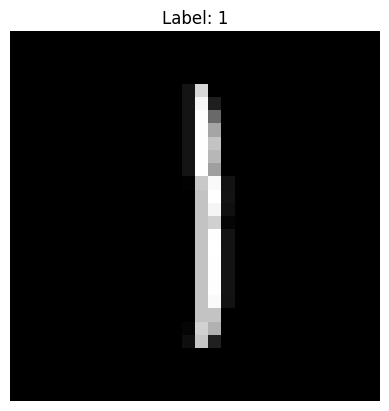

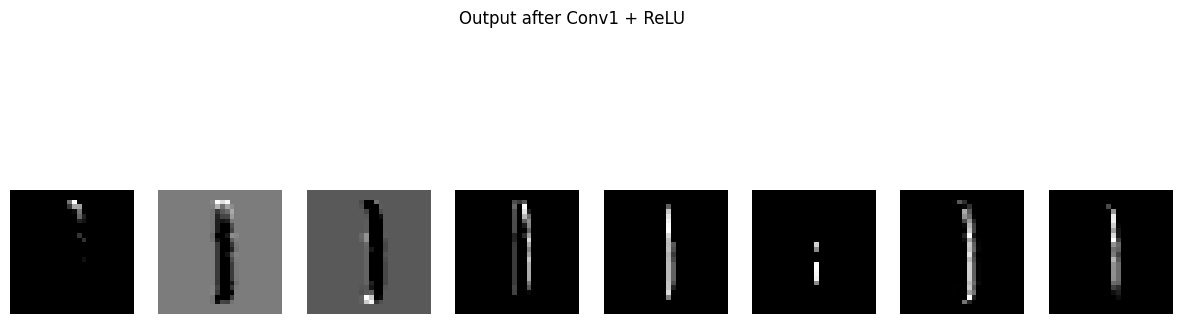

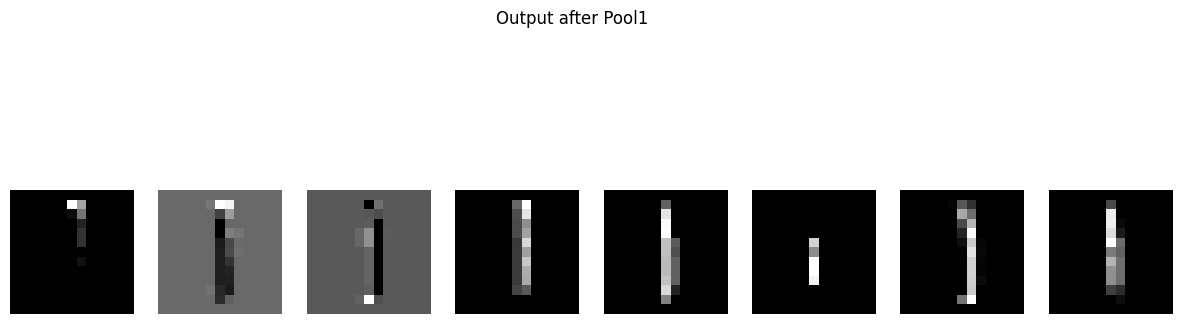

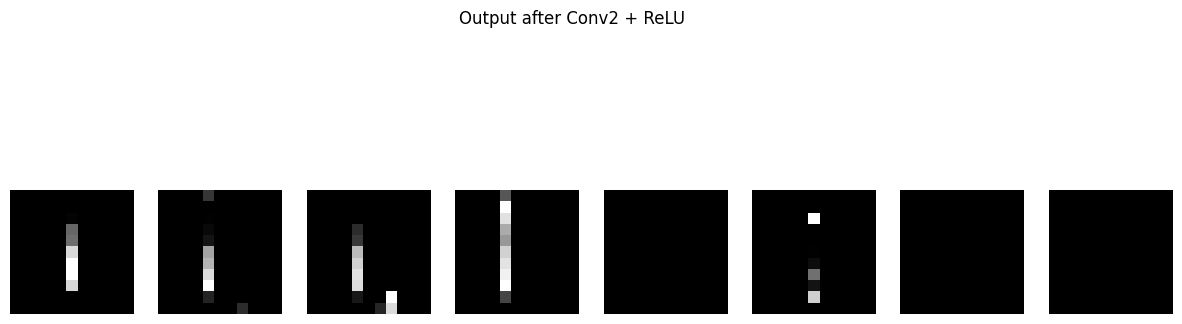

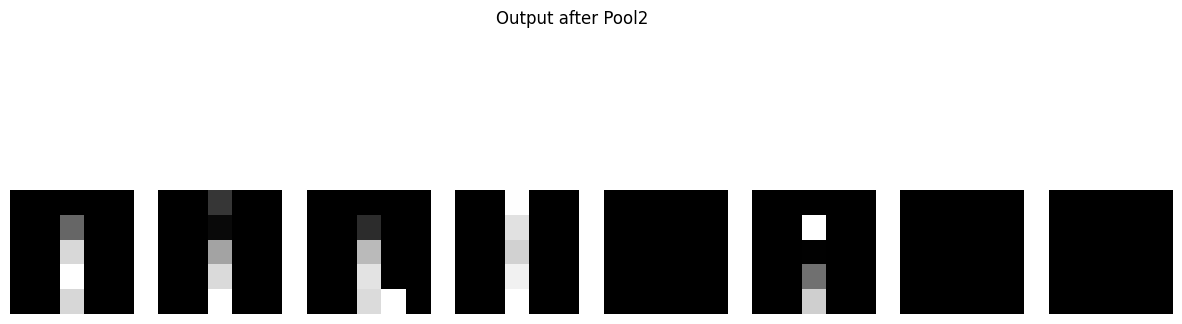

In [35]:
input=example_data[0][0]
input=input.unsqueeze(0).unsqueeze(0)
plt.imshow(example_data[0][0], cmap='gray')  # Original 2D image
plt.title(f'Label: {example_targets[0]}')  # Use the corresponding label
plt.axis('off')  # Hide axes for better visualization
plt.show()
#plot_feature_maps(input_tensor, "Original Image")

# Forward pass with visualization
with torch.no_grad():
    # Step 1: First convolution + activation
    conv1_output = F.relu(model.conv1(input))
    plot(conv1_output, "Output after Conv1 + ReLU")

    # Step 2: First pooling
    pool1_output = model.pool(conv1_output)
    plot(pool1_output, "Output after Pool1")

    # Step 3: Second convolution + activation
    conv2_output = F.relu(model.conv2(pool1_output))
    plot(conv2_output, "Output after Conv2 + ReLU")

    # Step 4: Second pooling
    pool2_output = model.pool(conv2_output)
    plot(pool2_output, "Output after Pool2")